# 시각화 도구

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 메뉴 - 런타임 - 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 한글 폰트 지정
plt.rc("font", family = "NanumGothic")

## matplotlib

### 준비

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/시도별 전출입 인구수.xlsx',
                   engine = 'openpyxl')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [ ]:
# NaN 값 채우기
df = df.fillna(method = 'ffill')

In [ ]:
# 서울시(전출지)에서 다른 지역(전입지)으로 이동한 인구 데이터
# 불 인덱스(True)를 데이터 추출
b_ind = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[b_ind]
df_seoul.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [ ]:
# 전출지별 열 삭제
df_seoul = df_seoul.drop('전출지별', axis = 1)
df_seoul.head()

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [ ]:
# 열 이름 변경
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis = 1)
df_seoul.head()

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [ ]:
# 행 인덱스 변경
df_seoul = df_seoul.set_index('전입지')
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [ ]:
df_ggd = df_seoul.loc['경기도']

In [ ]:
df_ggd

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

### 막대 그래프

In [ ]:
# 4개 지역 추출
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도']]
df_4.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [ ]:
# 행과 열을 바꾸기
df_4_t = df_4.T

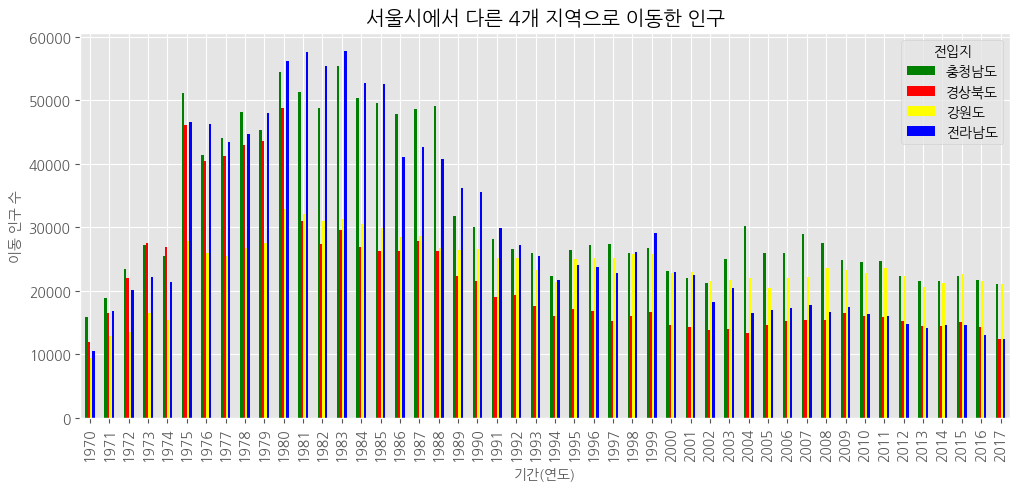

In [ ]:
# 스타일 서식 적용
plt.style.use('ggplot')
# 수직 막대 그래프
df_4_t.plot(kind = 'bar',
          figsize = (12,5),
          width = 0.5,
          color = ['green','red','yellow','blue'])
# 차트 제목
plt.title("서울시에서 다른 4개 지역으로 이동한 인구")
# 축 제목(이름)
plt.xlabel("기간(연도)", size = 10)
plt.ylabel("이동 인구 수", size = 10)
#
plt.show()

In [ ]:
# 2000년 이후 데이터 추출
df_4_new = df_4.loc[:, '2000':].T

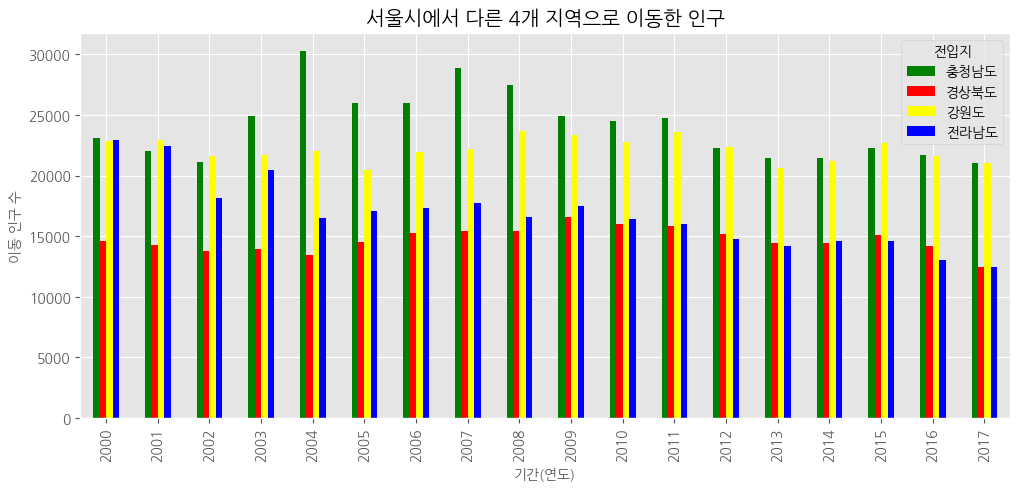

In [ ]:
# 스타일 서식 적용
plt.style.use('ggplot')
# 수직 막대 그래프
df_4_new.plot(kind = 'bar',
          figsize = (12,5),
          width = 0.5,
          color = ['green','red','yellow','blue'])
# 차트 제목
plt.title("서울시에서 다른 4개 지역으로 이동한 인구")
# 축 제목(이름)
plt.xlabel("기간(연도)", size = 10)
plt.ylabel("이동 인구 수", size = 10)
#
plt.show()

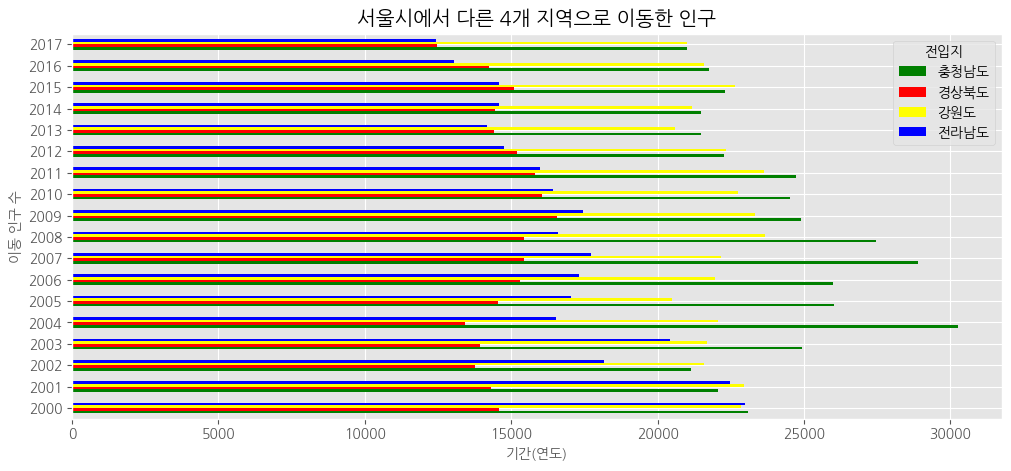

In [ ]:
# 스타일 서식 적용
plt.style.use('ggplot')
# 수평 막대 그래프
df_4_new.plot(kind = 'barh',
          figsize = (12,5),
          width = 0.5,
          color = ['green','red','yellow','blue'])
# 차트 제목
plt.title("서울시에서 다른 4개 지역으로 이동한 인구")
# 축 제목(이름)
plt.xlabel("기간(연도)", size = 10)
plt.ylabel("이동 인구 수", size = 10)
#
plt.show()

#### barh - 수평(역순)

In [ ]:
# 인구의 총합 데이터
df_total = df_4_new.T
df_total["합계"] = df_4_new.sum()

In [ ]:
df_total

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,,,,,,,,,,,
충청남도,23083,22056,21155,24942,30246,26012,25986,28898,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020,434258
경상북도,14576,14303,13762,13938,13414,14550,15285,15448,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464,265010
강원도,22832,22941,21582,21696,22071,20483,21969,22177,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016,398481
전라남도,22969,22457,18179,20432,16529,17049,17329,17717,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426,302765


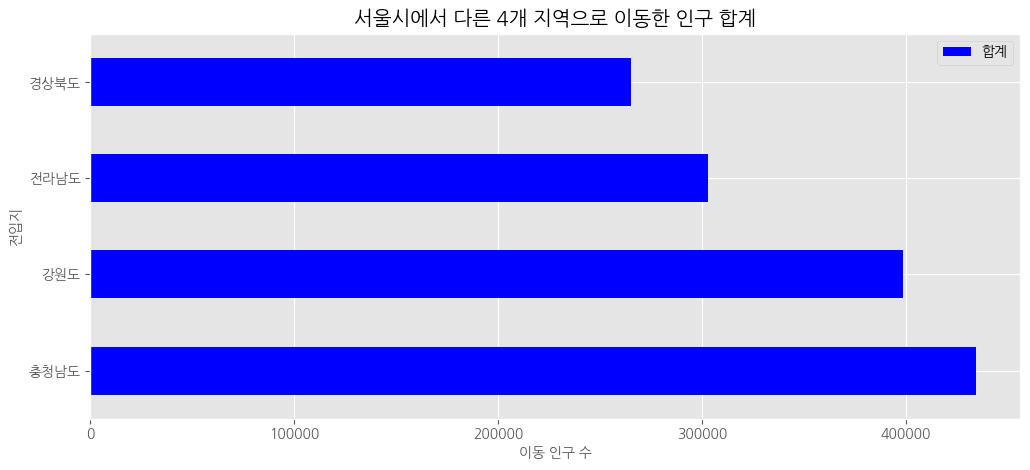

In [ ]:
# 인구 합계가 적은 지역부터 많은 지역으로 막대 그래프 시각화
# 인구 합계 내림차순 정렬
df_total_dsc = df_total[["합계"]].sort_values(by = '합계', ascending = False)
# 수평 막대 그래프 - 축 전환으로 인해 정렬 순서가 역순
df_total_dsc.plot(kind = 'barh',
                  figsize = (12,5),
                  width = 0.5,
                  color = 'blue')
# 차트 제목
plt.title("서울시에서 다른 4개 지역으로 이동한 인구 합계")
# 축 제목(이름)
plt.xlabel("이동 인구 수", size = 10)
plt.ylabel("전입지", size = 10)
#
plt.show()

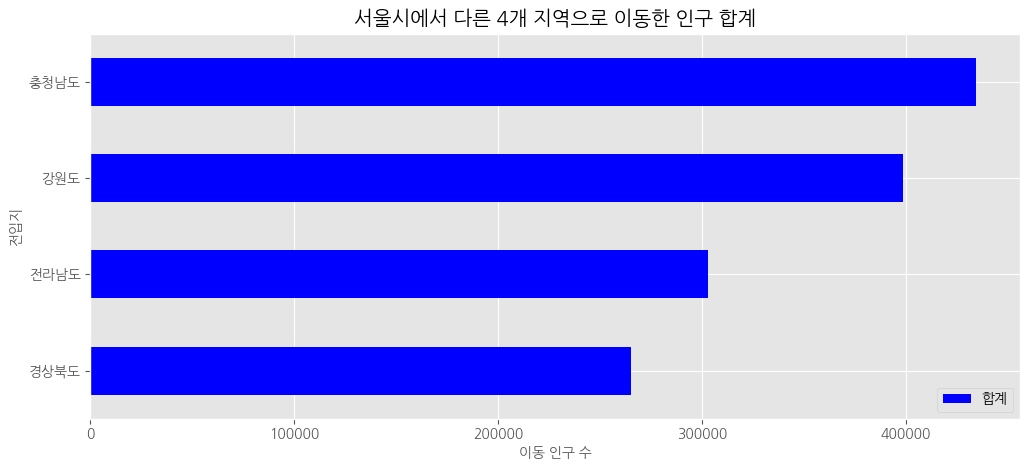

In [ ]:
# 인구 합계가 많은 지역부터 적은 지역으로 막대 그래프 시각화
# 인구 합계 오름차순 정렬
df_total_asc = df_total[["합계"]].sort_values(by = '합계')
# 수평 막대 그래프 - 축 전환으로 인해 정렬 순서가 역순
df_total_asc.plot(kind = 'barh',
                  figsize = (12,5),
                  width = 0.5,
                  color = 'blue')
# 차트 제목
plt.title("서울시에서 다른 4개 지역으로 이동한 인구 합계")
# 축 제목(이름)
plt.xlabel("이동 인구 수", size = 10)
plt.ylabel("전입지", size = 10)
#
plt.show()

#### bar - 수직(역순x)

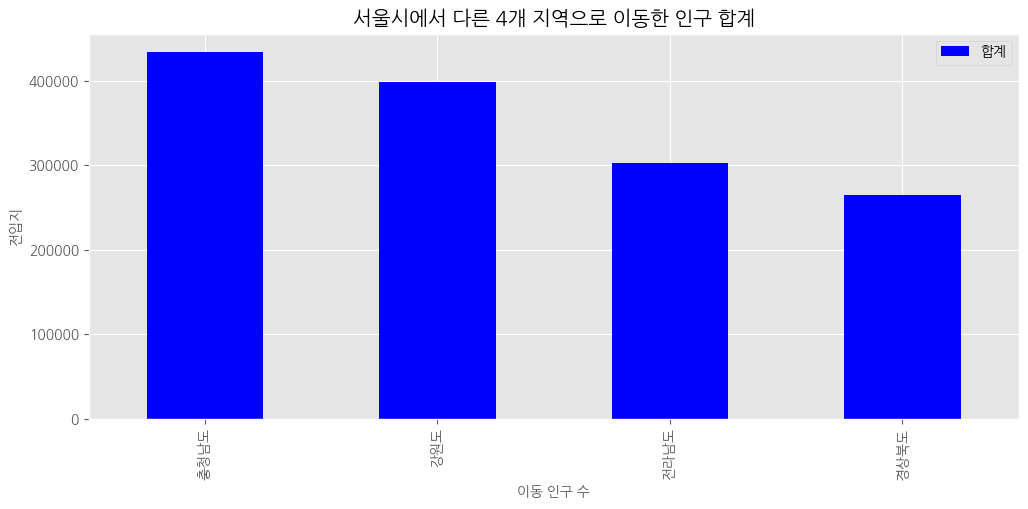

In [ ]:
# 인구 합계가 많은 지역부터 적은 지역으로 막대 그래프 시각화
# 인구 합계 내림차순 정렬
df_total_dsc = df_total[["합계"]].sort_values(by = '합계', ascending = False)
# 수직 막대 그래프
df_total_dsc.plot(kind = 'bar',
                  figsize = (12,5),
                  width = 0.5,
                  color = 'blue')
# 차트 제목
plt.title("서울시에서 다른 4개 지역으로 이동한 인구 합계")
# 축 제목(이름)
plt.xlabel("이동 인구 수", size = 10)
plt.ylabel("전입지", size = 10)
#
plt.show()

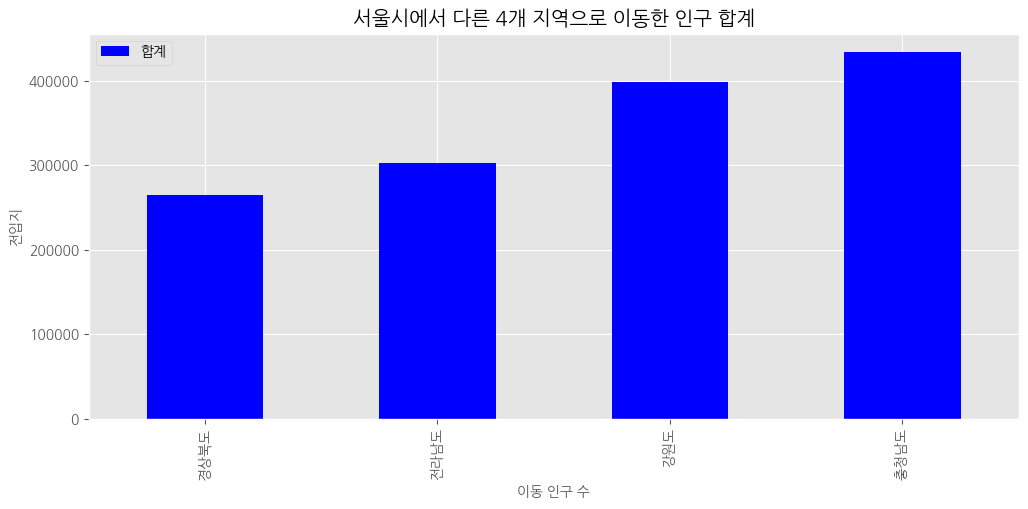

In [ ]:
# 인구 합계가 적은 지역부터 많은 지역으로 막대 그래프 시각화
# 인구 합계 오름차순 정렬
df_total_asc = df_total[["합계"]].sort_values(by = '합계')
# 수직 막대 그래프
df_total_asc.plot(kind = 'bar',
                  figsize = (12,5),
                  width = 0.5,
                  color = 'blue')
# 차트 제목
plt.title("서울시에서 다른 4개 지역으로 이동한 인구 합계")
# 축 제목(이름)
plt.xlabel("이동 인구 수", size = 10)
plt.ylabel("전입지", size = 10)
#
plt.show()

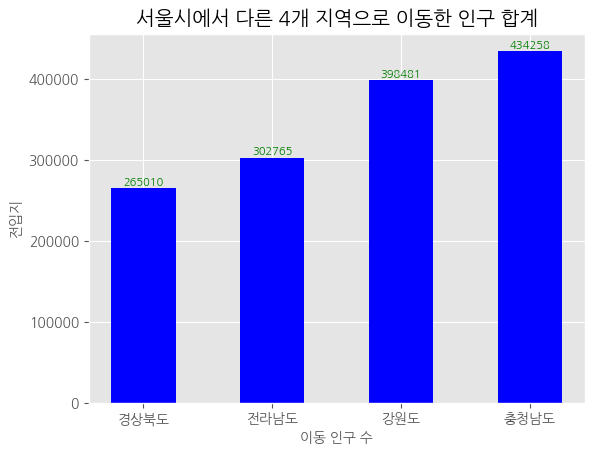

In [ ]:
# 수직 막대 그래프 - 막대 위에 값 추가
plt.bar(df_total_asc.index, df_total_asc['합계'],
        width = 0.5,
        color = 'blue')
# 차트 제목
plt.title("서울시에서 다른 4개 지역으로 이동한 인구 합계")
# 축 제목(이름)
plt.xlabel("이동 인구 수", size = 10)
plt.ylabel("전입지", size = 10)
# 텍스트 입력 - 막대 위에 값 추가
for i, j in enumerate(df_total_asc["합계"]):
  plt.annotate(j, (i, j), xytext = (0, 2), textcoords = 'offset points', fontsize = 8, ha = 'center', color = 'green')
plt.show()

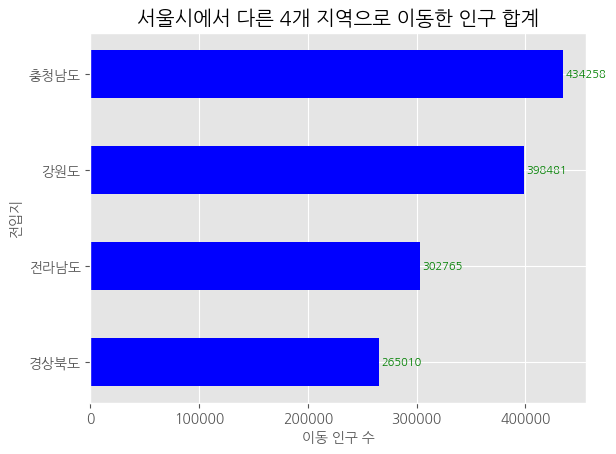

In [ ]:
# 수평 막대 그래프 - 막대 위에 값 추가, x y 좌표가 바뀌어야 함을 기억하자!
plt.barh(df_total_asc.index, df_total_asc['합계'],
        height = 0.5,
        color = 'blue')
# 차트 제목
plt.title("서울시에서 다른 4개 지역으로 이동한 인구 합계")
# 축 제목(이름)
plt.xlabel("이동 인구 수", size = 10)
plt.ylabel("전입지", size = 10)
# 텍스트 입력 - 막대 위에 값 추가, (i, j) => (j, i), ha => va 로 변경해야 함
for i, j in enumerate(df_total_asc["합계"]):
  plt.annotate(j, (j, i), xytext = (2, 0), textcoords = 'offset points', fontsize = 8, va = 'center', color = 'green')
plt.show()

#### 보조축(2축 그래프)

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/남북한발전전력량.xlsx',
                   engine = 'openpyxl')

In [ ]:
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
# 북한 데이터 추출
df_north = df.iloc[5:]

In [ ]:
# 전력량 (억㎾h) 열 삭제
df_north = df_north.drop('전력량 (억㎾h)', axis = 1)

In [ ]:
# 발전 전력별 열로 행 인덱스 설정
df_north = df_north.set_index('발전 전력별')

In [ ]:
# 행과 열 바꾸기
df_north = df_north.T

In [ ]:
df_north

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [ ]:
# 전력 증감율 계산
df_north = df_north.rename(columns = {'합계':'총발전량'})

In [ ]:
df_north['전년총발전량'] = df_north['총발전량'].shift(1)

In [ ]:
df_north

발전 전력별,총발전량,수력,화력,원자력,전년총발전량
1990,277,156,121,-,None
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221
1995,230,142,88,-,231
1996,213,125,88,-,230
1997,193,107,86,-,213
1998,170,102,68,-,193
1999,186,103,83,-,170


In [ ]:
# 증감율 = ((금년총발전량 - 전년총발전량) / 전년총발전량)*100
# 총발전량 = 금년총발전량
df_north['증감율'] = ((df_north['총발전량'] - df_north['전년총발전량'])
                    /df_north['전년총발전량'])*100

In [ ]:
df_north

발전 전력별,총발전량,수력,화력,원자력,전년총발전량,증감율
1990,277,156,121,-,None,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


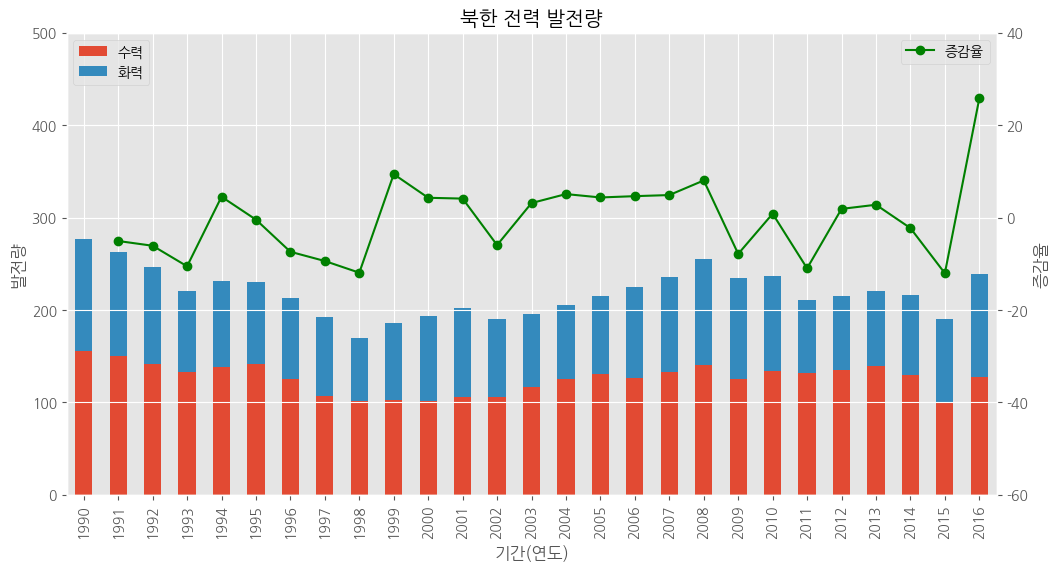

In [ ]:
# 한글 폰트 설정
plt.rc("font", family = "NanumGothic")
# 스타일 서식
plt.style.use("ggplot")
# 마이너스 기호 출력
plt.rcParams['axes.unicode_minus'] = False
# axe 객체
# 수력, 화력 발전에 대한 누적 막대 그래프
ax1 = df_north[['수력', '화력']].plot(kind = 'bar', stacked = True, figsize = (12,6))
ax2 = ax1.twinx() # x 축 공유
# 증감율에 대한 선 그래프
ax2.plot(df_north.index, df_north['증감율'], color = 'green', marker = 'o', label = '증감율')
# y 축 범위 조정
ax1.set_ylim(0, 500)
ax2.set_ylim(-60, 40)
# 차트 제목
plt.title("북한 전력 발전량")
# 축 이름
ax1.set_xlabel('기간(연도)')
ax1.set_ylabel('발전량')
ax2.set_ylabel('증감율')
# 범례
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'best')
#
plt.show()

### 히스토그램

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
# csv 파일 불러오기 + 열 이름이 없음(header = None)
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/auto-mpg.csv', header = None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [ ]:
# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model_year', 'origin', 'car_name']

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

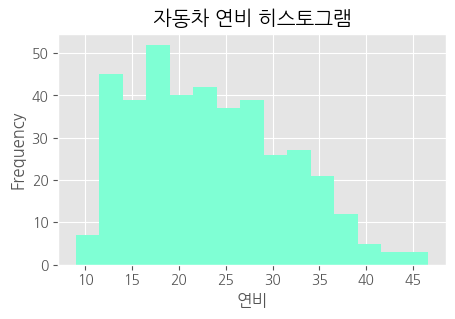

In [ ]:
# 한글 폰트 설정
plt.rc("font", family = "NanumGothic")
# 스타일 서식
plt.style.use("ggplot")
# 히스토그램
df['mpg'].plot(kind = 'hist',
               bins = 15, # 구간 개수
               color = 'aquamarine',
               figsize = (5,3))
# 차트 제목
plt.title("자동차 연비 히스토그램")
# x 축 이름
plt.xlabel("연비")
#
plt.show()

### 산점도

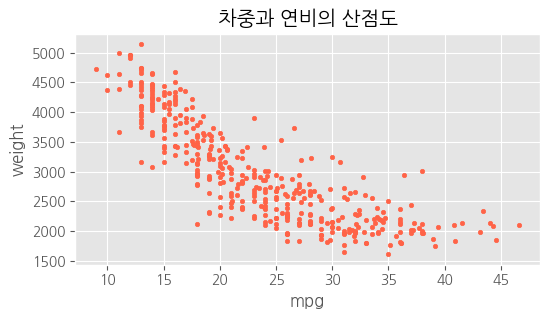

In [ ]:
# 스타일 서식
plt.style.use("ggplot")
# 산점도
df.plot(kind = 'scatter',
        x = 'mpg',
        y = 'weight',
        c = 'tomato', # 색상
        s = 10, # 크기
        figsize = (6,3))
# 차트 제목
plt.title("차중과 연비의 산점도")
#
plt.show()

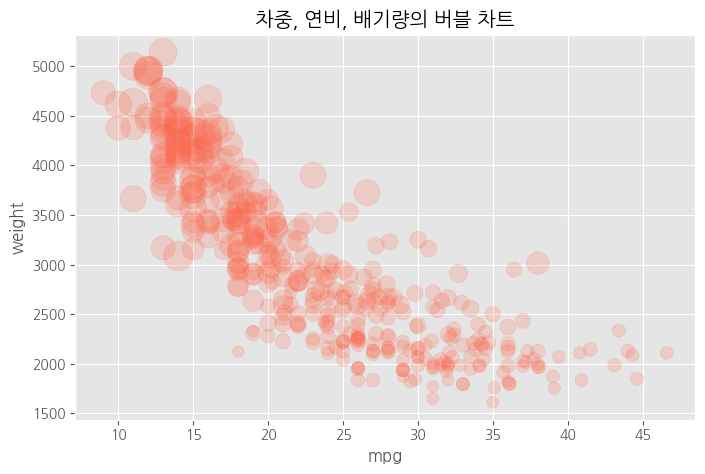

In [ ]:
# 버블 차트 = 원의 크기로 그리기
# 스타일 서식
plt.style.use("ggplot")
# 산점도
df.plot(kind = 'scatter',
        x = 'mpg',
        y = 'weight',
        c = 'tomato', # 색상
        s = 'displacement', # 크기
        alpha = 0.2,
        figsize = (8,5))
# 차트 제목
plt.title("차중, 연비, 배기량의 버블 차트")
#
plt.show()

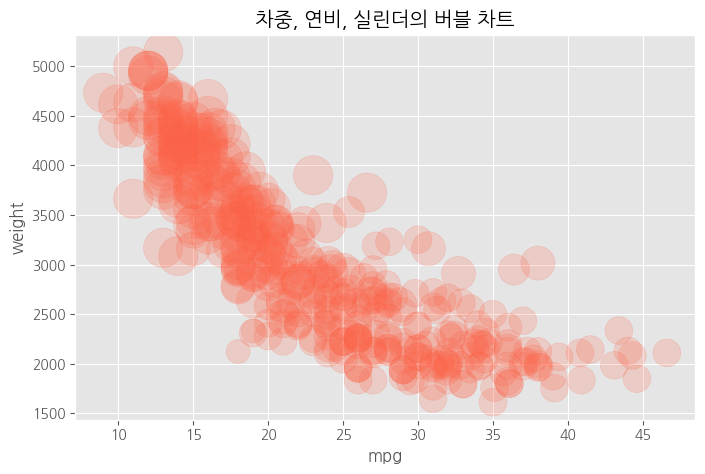

In [ ]:
# 버블 차트 = 원의 크기로 그리기
# 스타일 서식
plt.style.use("ggplot")
# cylinders 전처리
cy = df.cylinders * 100
# cy = df.cylinders / df.cylinders.max() * 100
# 산점도
df.plot(kind = 'scatter',
        x = 'mpg',
        y = 'weight',
        c = 'tomato', # 색상
        s = cy, # 크기
        alpha = 0.2,
        figsize = (8,5))
# 차트 제목
plt.title("차중, 연비, 실린더의 버블 차트")
#
plt.show()

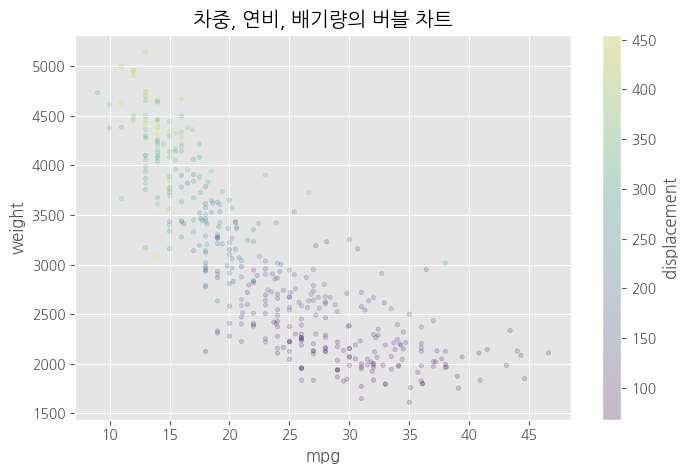

In [ ]:
# 원의 색상으로 그리기 - 숫자형 변수
# 컬러맵 없이 그리기
# 스타일 서식
plt.style.use("ggplot")
# 산점도
df.plot(kind = 'scatter',
        x = 'mpg',
        y = 'weight',
        c = 'displacement', # 색상
        s = 10, # 크기
        alpha = 0.2,
        figsize = (8,5))
# 차트 제목
plt.title("차중, 연비, 배기량의 버블 차트")
#
plt.show()

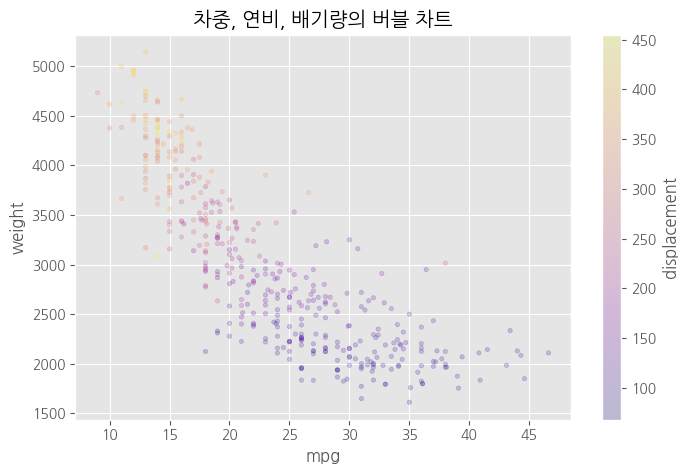

In [ ]:
# 원의 색상으로 그리기 - 숫자형 변수
# 컬러맵 추가하여 그리기
# 스타일 서식
plt.style.use("ggplot")
# 산점도
df.plot(kind = 'scatter',
        x = 'mpg',
        y = 'weight',
        c = 'displacement', # 색상
        cmap = 'plasma', # 컬러맵
        s = 10, # 크기
        alpha = 0.2,
        figsize = (8,5))
# 차트 제목
plt.title("차중, 연비, 배기량의 버블 차트")
#
plt.show()

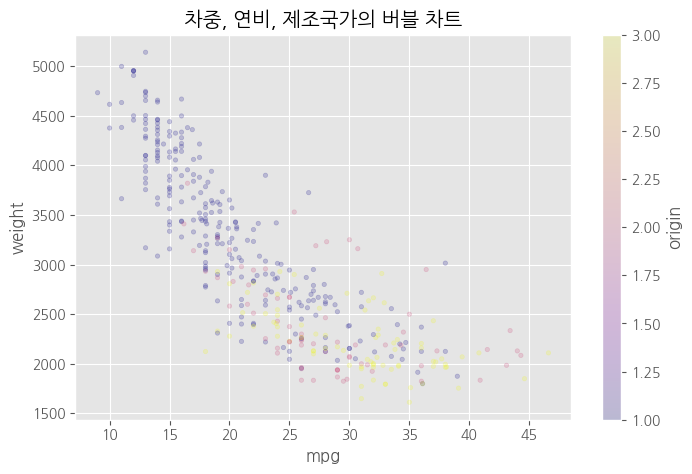

In [ ]:
# 원의 색상으로 그리기 - 범주형 변수
# 범주형 변수이지만 원래 데이터에서 숫자로 되어 있음
# 스타일 서식
plt.style.use("ggplot")
# 산점도
df.plot(kind = 'scatter',
        x = 'mpg',
        y = 'weight',
        c = 'origin', # 색상
        cmap = 'plasma', # 컬러맵
        s = 10, # 크기
        alpha = 0.2,
        figsize = (8,5))
# 차트 제목
plt.title("차중, 연비, 제조국가의 버블 차트")
#
plt.show()

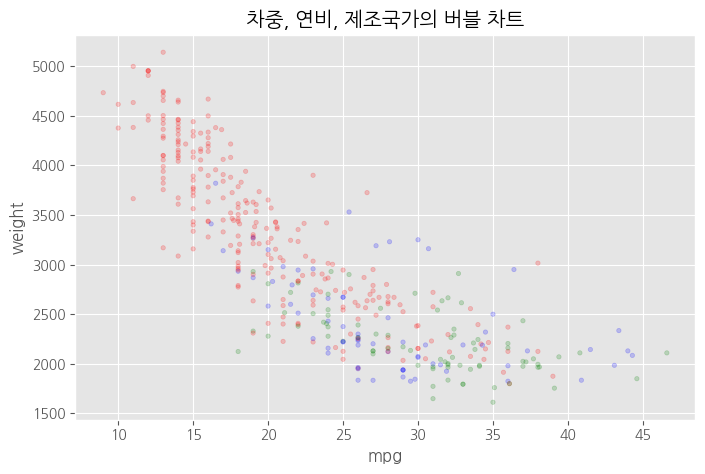

In [ ]:
# 원의 색상으로 그리기 - 범주형 변수
# 숫자로 되어 있는 범주형 변수를 category 로 변환하여 그리기
# 컬러맵 수동으로 만들어 그리기
# 스타일 서식
plt.style.use("ggplot")
# origin 전처리
origin_cat = df.origin.astype('category')
# 컬러맵 수동으로 만들기
from matplotlib.colors import ListedColormap
colors = ListedColormap(['r','b','g'])
# 산점도
df.plot(kind = 'scatter',
        x = 'mpg',
        y = 'weight',
        c = origin_cat, # 색상
        cmap = colors, # 컬러맵
        s = 10, # 크기
        alpha = 0.2,
        figsize = (8,5))
# 차트 제목
plt.title("차중, 연비, 제조국가의 버블 차트")
#
plt.show()

### 파이차트(원 그래프)

In [ ]:
# origin 별로 sum 데이터 만들기
df['count'] = 1
df_origin = df.groupby('origin').sum(numeric_only = True)
df_origin.index = ["USA", "EU", "JAP"]

In [ ]:
df_origin

,mpg,cylinders,displacement,weight,acceleration,model_year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAP,2405.6,324,8114.0,175477.0,1277.6,6118,79


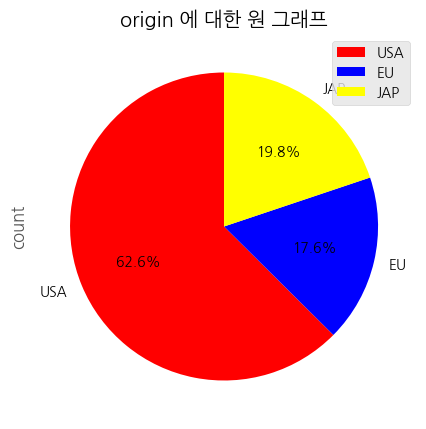

In [ ]:
# 스타일 서식
plt.style.use("ggplot")
# 파이 차트
df_origin['count'].plot(kind = 'pie',
                        figsize = (10, 5),
                        # autopct = '%.1f', # 소수점 첫째자리 숫자만 표시
                        autopct = '%.1f%%', # 소수점 첫째자리로 % 와 함께 표시
                        colors = ['red','blue','yellow'], # 각 조각의 색상
                        startangle = 90) # 시작 위치, 기본값 0 = 360 => 우측 중간 시작
# 차트 제목
plt.title("origin 에 대한 원 그래프")
# 범례
plt.legend(loc = 'best')
#
plt.show()

### 상자 수염 그림

In [ ]:
# origin 별로 연비 데이터 만들기
mpg_1 = df[df['origin'] == 1]['mpg']
mpg_2 = df[df['origin'] == 2]['mpg']
mpg_3 = df[df['origin'] == 3]['mpg']

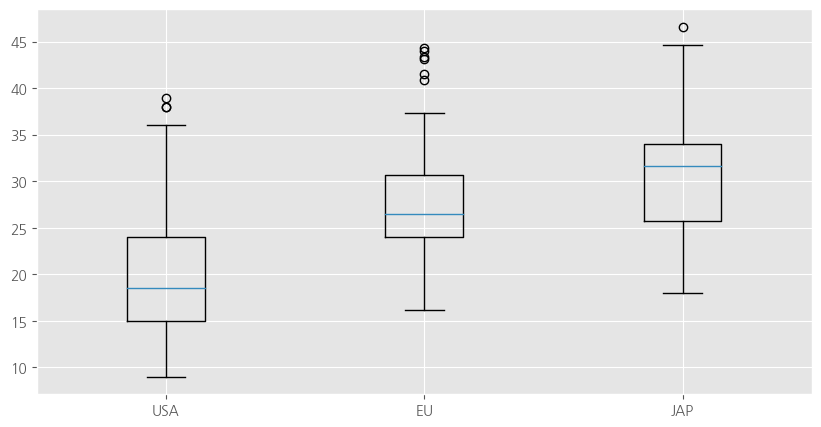

In [ ]:
# 그림 객체
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1,1,1)
# 수직 상자 그림
ax.boxplot(x = [mpg_1, mpg_2, mpg_3],
           labels = ['USA', 'EU', 'JAP'])
plt.show()

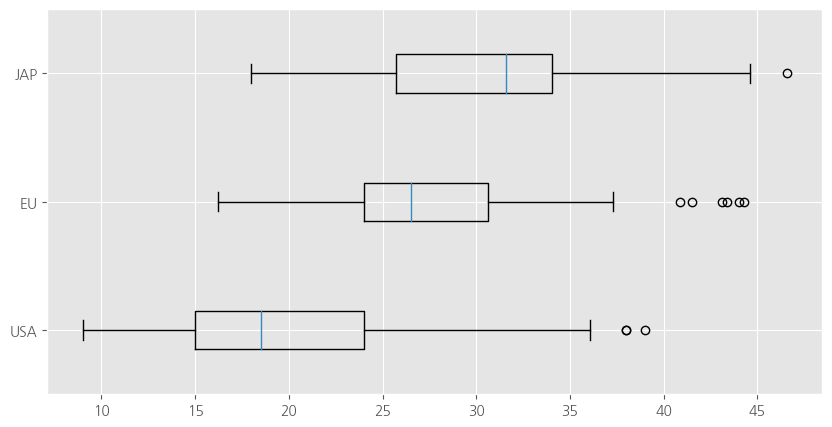

In [ ]:
# 그림 객체
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1,1,1)
# 수평 상자 그림
ax.boxplot(x = [mpg_1, mpg_2, mpg_3],
           labels = ['USA', 'EU', 'JAP'],
           vert = False)
plt.show()

### 컬러맵

In [ ]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

## seaborn

In [ ]:
# 라이브러리 불러오기
import seaborn as sns

In [ ]:
# 내장 데이터 불러오기
titanic = sns.load_dataset("titanic")
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
# 데이터 정보
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


### 스타일 적용

In [ ]:
# 스타일 적용
# darkgrid, whitegrid, dark, white, ticks
sns.set_style('darkgrid')

### 산점도

In [ ]:
import matplotlib.pyplot as plt

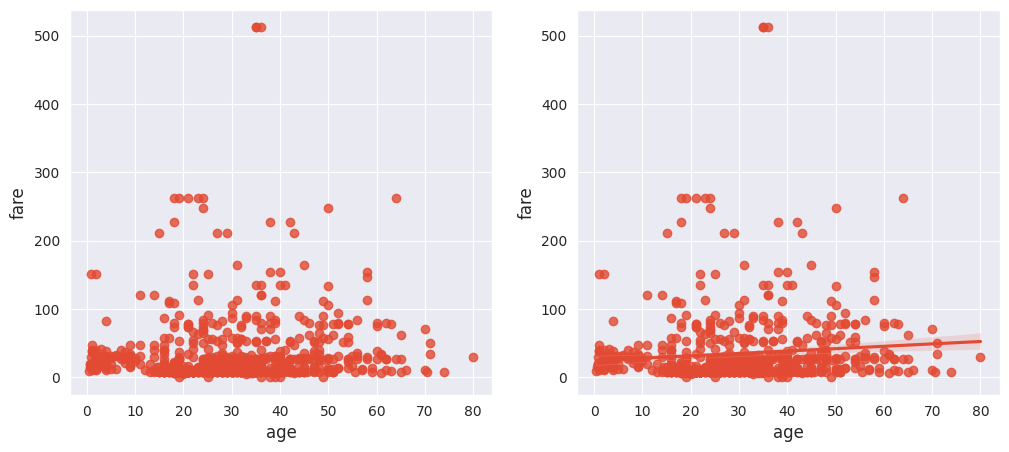

In [ ]:
# 그래프 객체
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# 산점도
# 회귀선이 없는 산점도
sns.regplot(x = 'age', y = 'fare', # 변수 설정
            data = titanic, # 데이터 설정
            ax = ax1, # axe 객체 설정 = 위치 설정
            fit_reg = False)
# 회귀선이 있는 산점도
sns.regplot(x = 'age', y = 'fare', # 변수 설정
            data = titanic, # 데이터 설정
            ax = ax2, # axe 객체 설정 = 위치 설정
            fit_reg = True)
plt.show()

### 히스토그램, 밀도 함수 그래프

<ipython-input-93-666158a7fb96>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax = ax1)


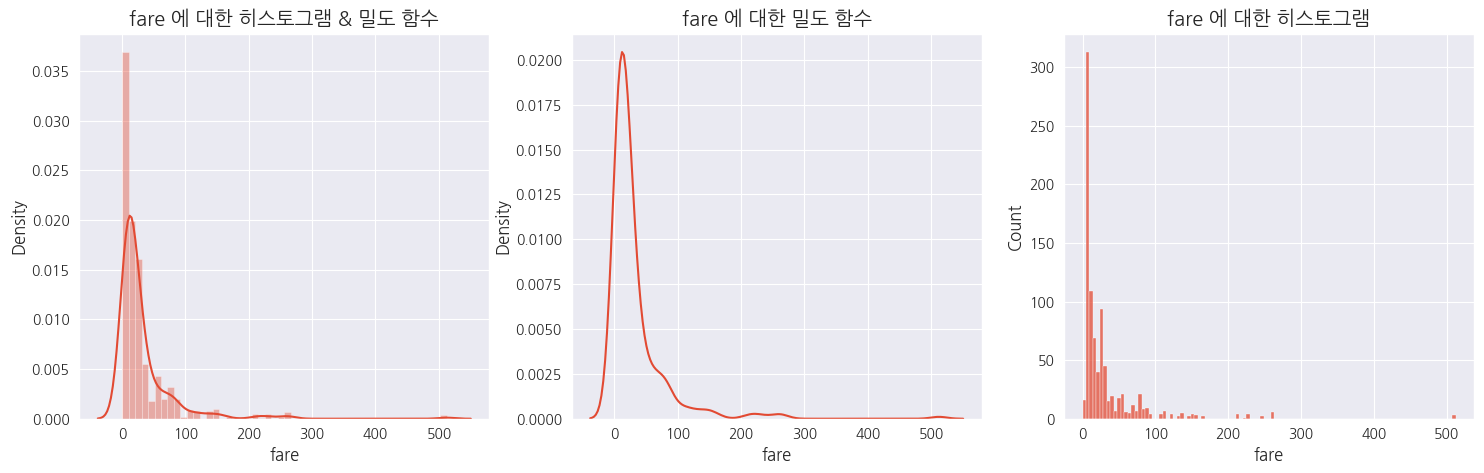

In [ ]:
# 한글 폰트 설정
plt.rc("font", family = "NanumGothic")
# 그래프 객체
fig = plt.figure(figsize = (18, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
# 히스토그램 + 밀도함수 그래프
sns.distplot(titanic['fare'], ax = ax1)
# sns.histplot(titanic['fare'], ax = ax1, kde = True)
# 밀도함수 그래프
sns.kdeplot(titanic['fare'], ax = ax2)
# 히스토그램
sns.histplot(titanic['fare'], ax = ax3)
# 제목 추가
ax1.set_title("fare 에 대한 히스토그램 & 밀도 함수")
ax2.set_title("fare 에 대한 밀도 함수")
ax3.set_title("fare 에 대한 히스토그램")
#
plt.show()

### 히트맵

In [ ]:
# 피봇 테이블
table = titanic.pivot_table(index = 'sex', columns = 'class', aggfunc = 'size')

In [ ]:
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


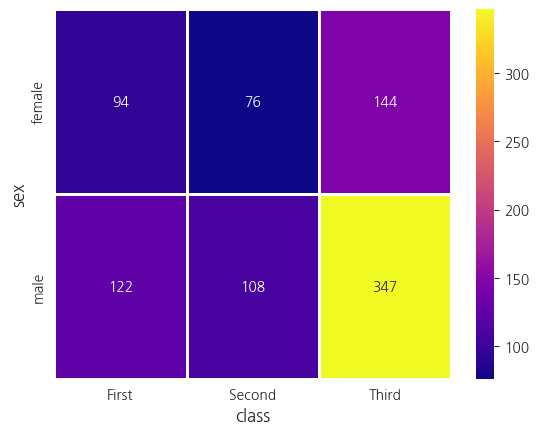

In [ ]:
# 히트맵
sns.heatmap(table,
            annot = True, # 데이터 값 표시 여부
            fmt = 'd', # 숫자 표현 방식 지정, d = 정수
            cmap = 'plasma', # 컬러맵
            linewidth = 1, # 구분선
            cbar = True) # 컬러바 표시 여부
plt.show()

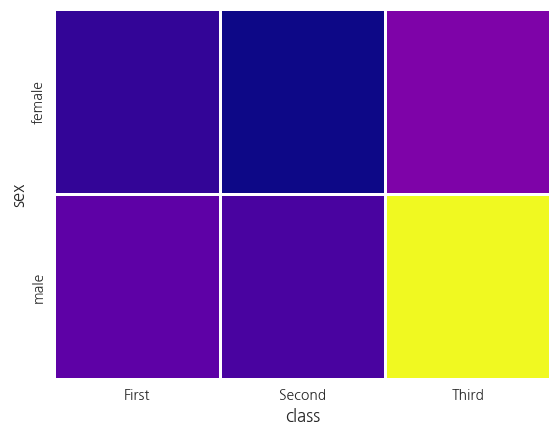

In [ ]:
# 히트맵
sns.heatmap(table,
            annot = False, # 데이터 값 표시 여부
            fmt = 'd', # 숫자 표현 방식 지정, d = 정수
            cmap = 'plasma', # 컬러맵
            linewidth = 1, # 구분선
            cbar = False) # 컬러바 표시 여부
plt.show()

### 범주형 변수 산점도

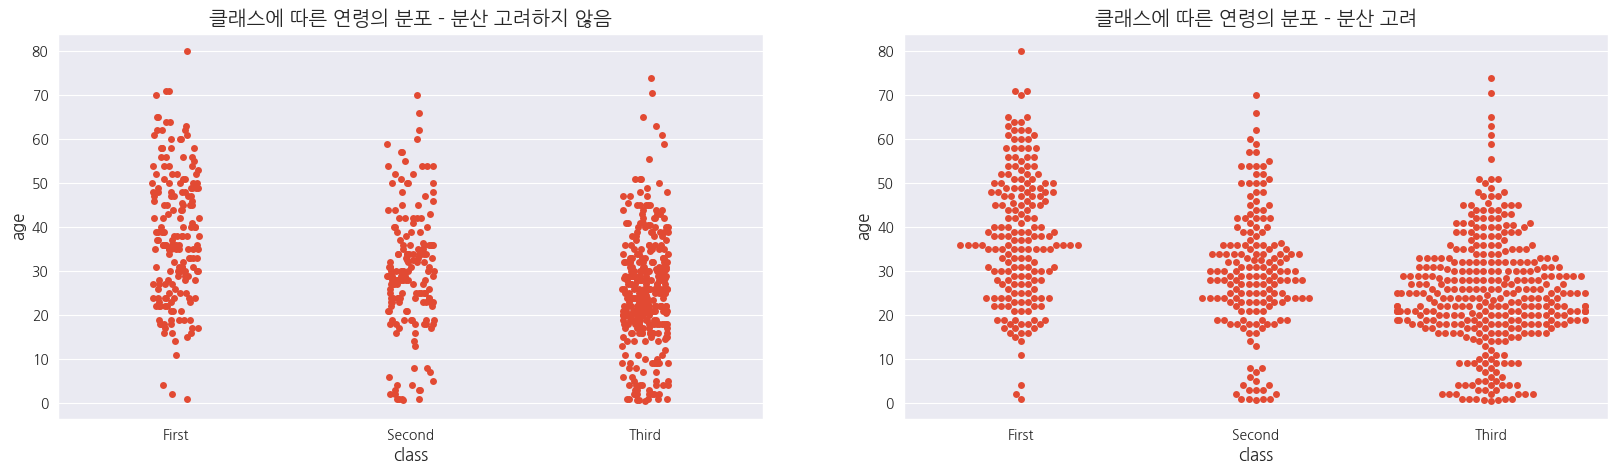

In [ ]:
# 한글 폰트 설정
plt.rc("font", family = "NanumGothic")
# 그래프 객체
fig = plt.figure(figsize = (20, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# 범주형 변수 산점도
# 1) 분산 고려하지 않은 경우
sns.stripplot(x = 'class', y = 'age', data = titanic, ax = ax1)
# 2) 분산 고려한 경우
sns.swarmplot(x = 'class', y = 'age', data = titanic, ax = ax2)
# 제목 추가
ax1.set_title('클래스에 따른 연령의 분포 - 분산 고려하지 않음')
ax2.set_title('클래스에 따른 연령의 분포 - 분산 고려')
plt.show()

### 비율 막대 그래프

In [ ]:
import matplotlib.pyplot as plt
# 스타일 테마
# darkgrid, whitegrid, dark, white, ticks
sns.set_style("whitegrid")

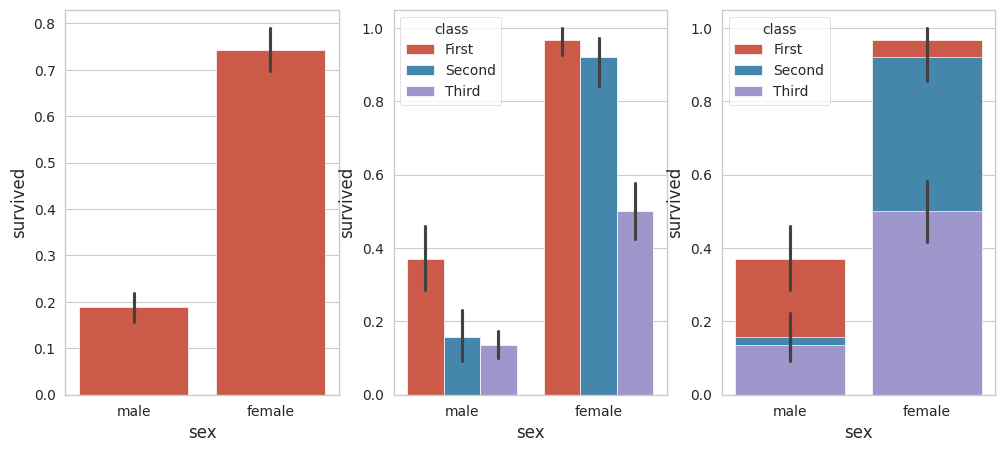

In [ ]:
# 그래프 객체 생성
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# 막대 그래프 & 에러바
sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1)
sns.barplot(x = 'sex', y = 'survived', hue = 'class',
            data = titanic, ax = ax2)
sns.barplot(x = 'sex', y = 'survived', hue = 'class', dodge = False,
            data = titanic, ax = ax3)
# 줄 같이 생긴 것 = 에러바 (표준편차, 표준오차, 신뢰구간 등)
# 기본값은 신뢰구간
plt.show()

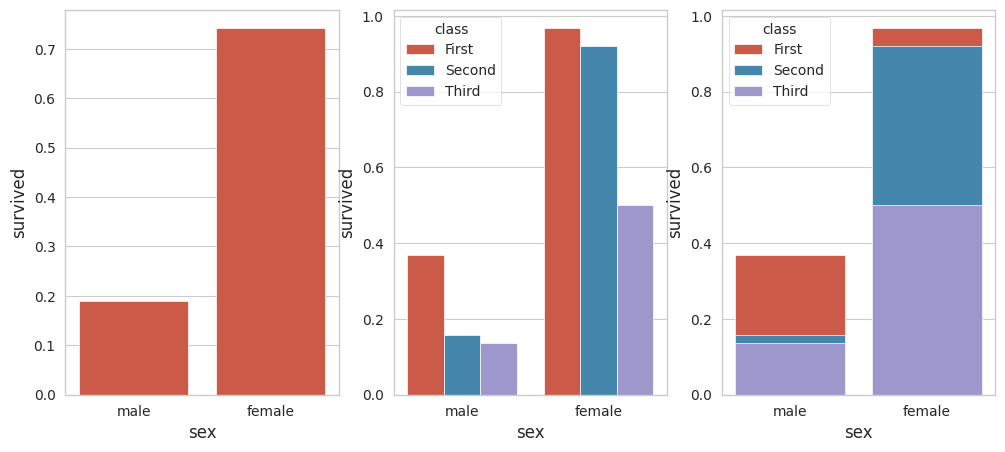

In [ ]:
# 그래프 객체 생성
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# 막대 그래프 & 에러바 없이
sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1, errorbar = None)
sns.barplot(x = 'sex', y = 'survived', hue = 'class',
            data = titanic, ax = ax2, errorbar = None)
sns.barplot(x = 'sex', y = 'survived', hue = 'class', dodge = False,
            data = titanic, ax = ax3, errorbar = None)
# 줄 같이 생긴 것 = 에러바 (표준편차, 표준오차, 신뢰구간 등)
# 기본값은 신뢰구간
plt.show()

### 빈도 막대 그래프

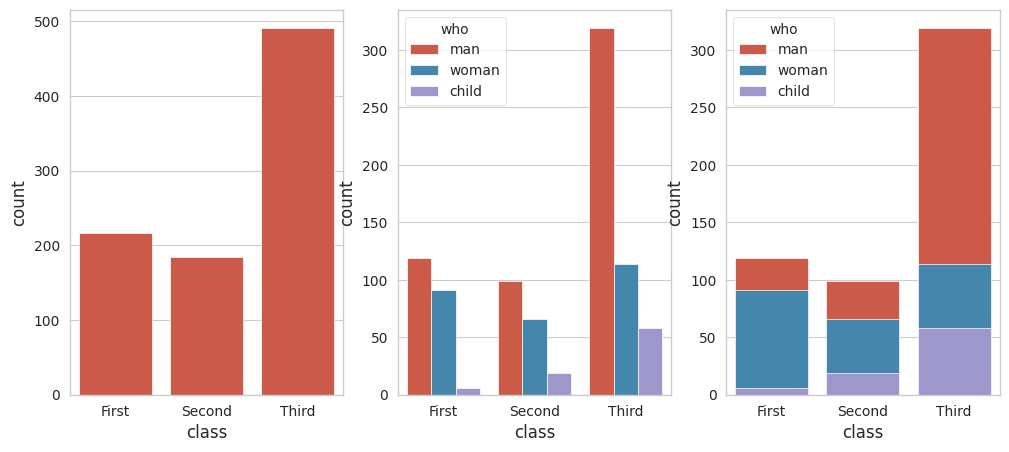

In [ ]:
# 그래프 객체 생성
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# 막대 그래프
sns.countplot(x = 'class', data = titanic, ax = ax1)
sns.countplot(x = 'class', hue = 'who',
              data = titanic, ax = ax2)
sns.countplot(x = 'class', hue = 'who', dodge = False,
              data = titanic, ax = ax3) # 그래프만 누적
#
plt.show()

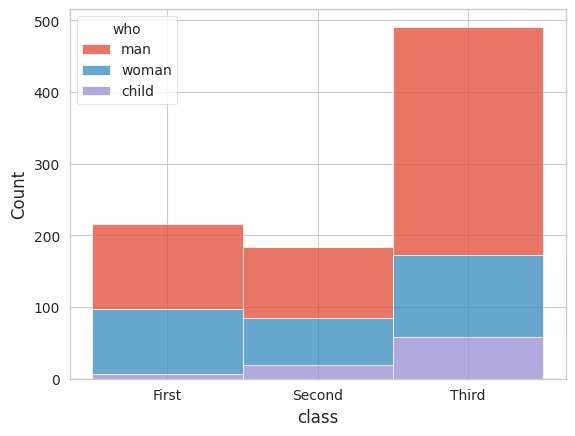

In [ ]:
sns.histplot(x = 'class', hue = 'who', multiple='stack',
              data = titanic) # 빈도 누적 = 전체합
#
plt.show()

### 상자그림 & 바이올린 그림

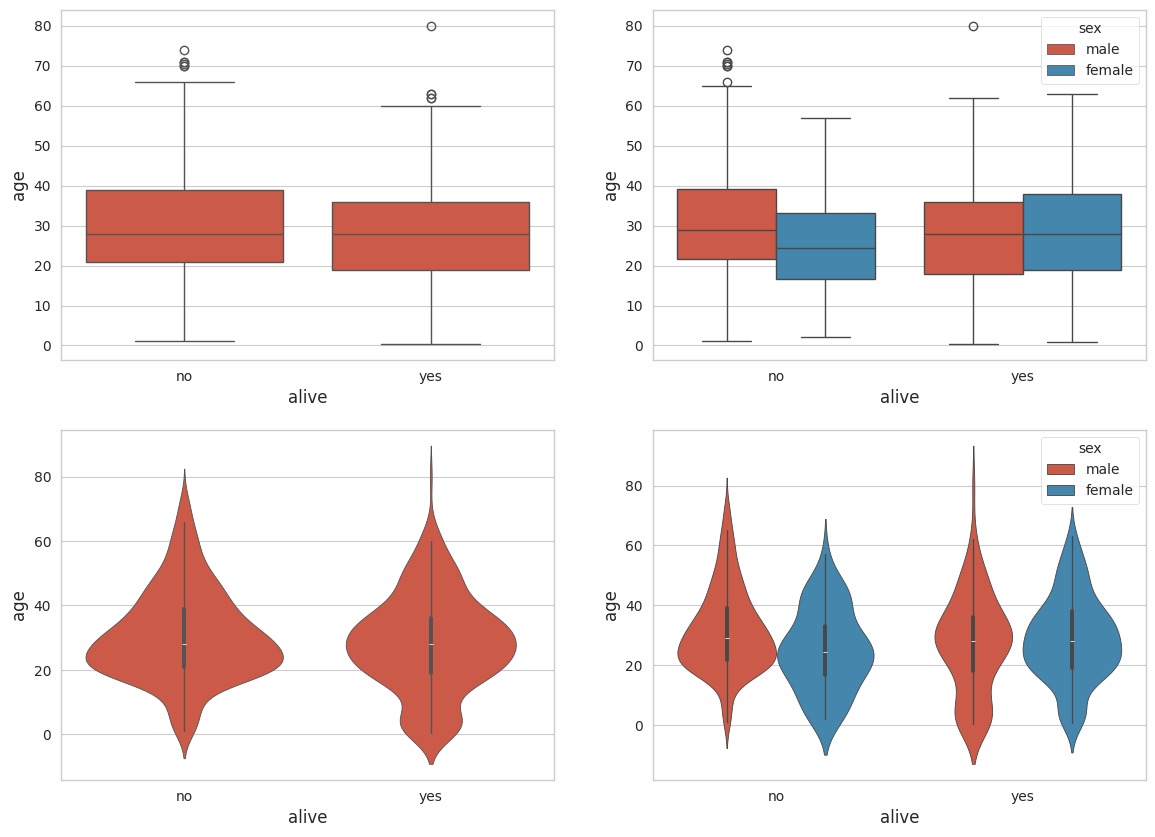

In [ ]:
# 그래프 객체 생성
fig = plt.figure(figsize = (14, 10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
# 상자 그림
sns.boxplot(x = 'alive', y = 'age', data = titanic, ax = ax1)
sns.boxplot(x = 'alive', y = 'age', hue = 'sex',
            data = titanic, ax = ax2)
# 바이올린 그림
sns.violinplot(x = 'alive', y = 'age', data = titanic, ax = ax3)
sns.violinplot(x = 'alive', y = 'age', hue = 'sex',
            data = titanic, ax = ax4)
#
plt.show()

### 조인트 그림

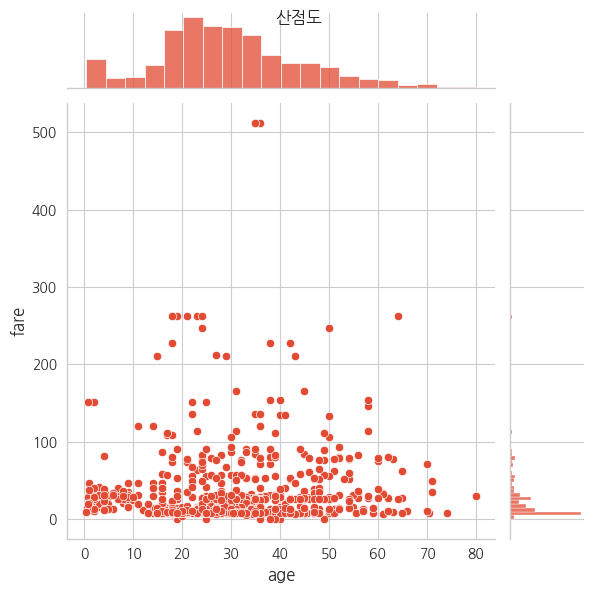

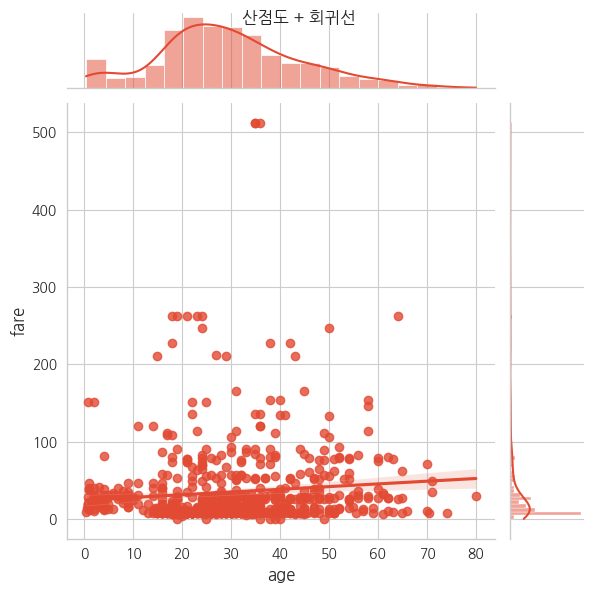

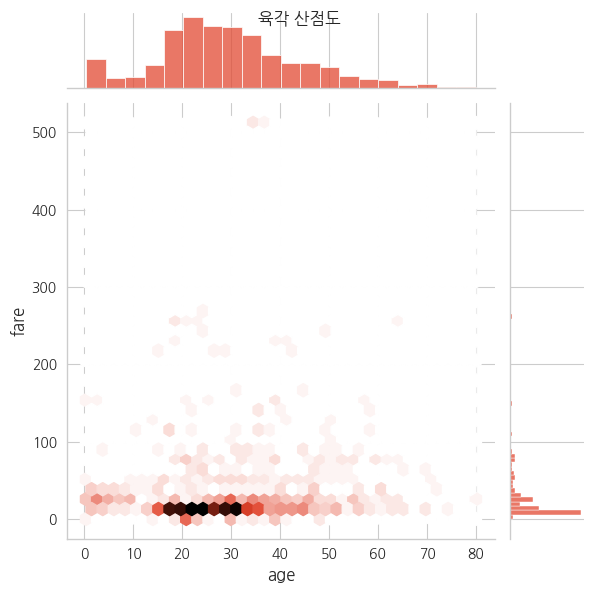

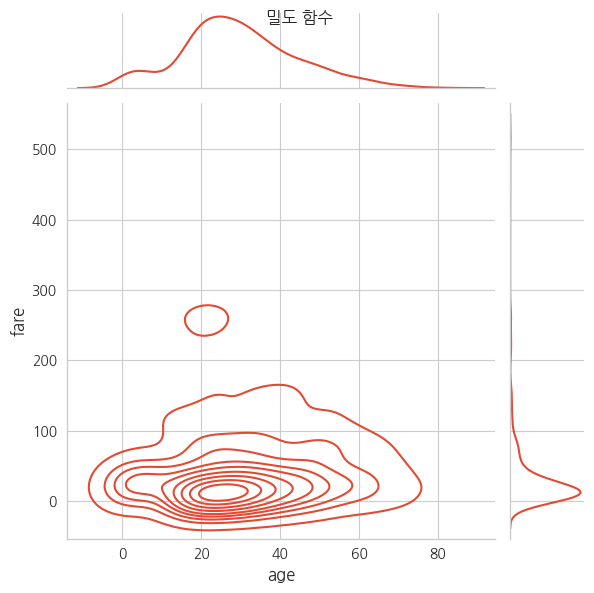

In [ ]:
# 한글 폰트 설정
plt.rc("font", family = "NanumGothic")
# 조인트 그림 - 산점도(기본값)
jp1 = sns.jointplot(x = 'age', y = 'fare', data = titanic)
# 조인트 그림 - 산점도 + 회귀선
jp2 = sns.jointplot(x = 'age', y = 'fare', kind = 'reg', data = titanic)
# 조인트 그림 - 육각 산점도
jp3 = sns.jointplot(x = 'age', y = 'fare', kind = 'hex', data = titanic)
# 조인트 그림 - 밀도 함수
jp4 = sns.jointplot(x = 'age', y = 'fare', kind = 'kde', data = titanic)
# 제목
jp1.fig.suptitle("산점도")
jp2.fig.suptitle("산점도 + 회귀선")
jp3.fig.suptitle("육각 산점도")
jp4.fig.suptitle("밀도 함수")
#
plt.show()

### 그리드 분할

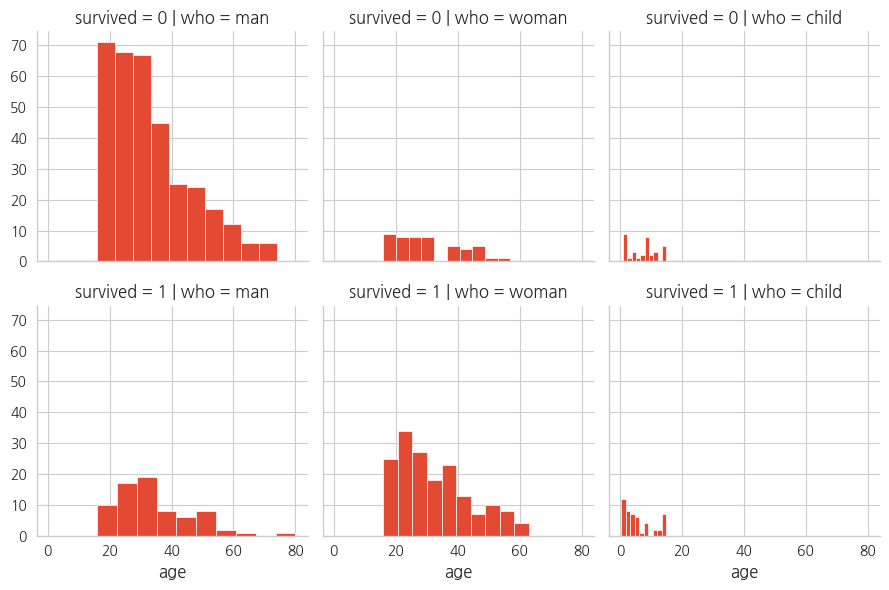

In [ ]:
# 그리드 분할 = 빈도표를 만들듯이 화면을 분할해서 시각화
grid = sns.FacetGrid(data = titanic,
                     row = 'survived',
                     col = 'who')
# 그래프 넣기
grid.map(plt.hist, 'age')
#
plt.show()

### pairplot

In [ ]:
# 변수들을 2개씩 짝을 지어서 시각화
pair_data = titanic[['age', 'pclass', 'fare']]

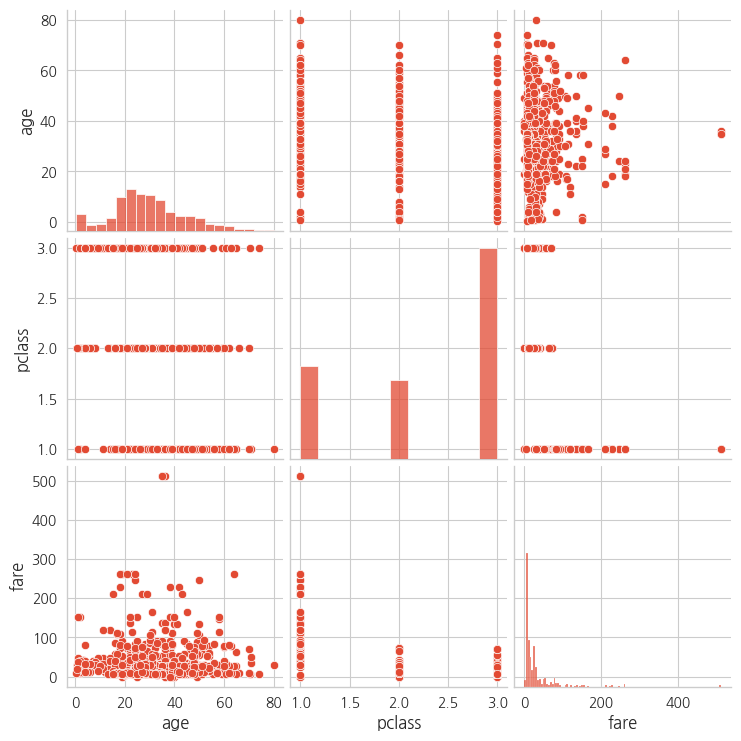

In [ ]:
sns.pairplot(pair_data)
#
plt.show()

## plotly

### 산점도

In [ ]:
# 라이브러리 불러오기
import plotly.express as px

In [ ]:
# 내장 데이터 불러오기
df = px.data.iris()
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1


In [ ]:
# 데이터 정보
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
px.scatter(data_frame = df, x = 'sepal_length', y = 'sepal_width')

In [ ]:
# 그룹을 색으로 구분
px.scatter(data_frame = df, x = 'sepal_length', y = 'sepal_width', color = 'species')

In [ ]:
# 그룹을 색으로 구분 & 마커 스타일 다르게 표현
px.scatter(data_frame = df, x = 'sepal_length', y = 'sepal_width', color = 'species', symbol = 'species')

In [ ]:
# 마커 크기를 다르게 표현
px.scatter(data_frame = df, x = 'sepal_length', y = 'sepal_width', size = 'petal_length')

In [ ]:
# 추세선 추가
px.scatter(data_frame = df, x = 'sepal_length', y = 'sepal_width', trendline = 'ols')
# 실행이 되지 않을 때 설치할 것
# !pip install statsmodels

In [ ]:
# 그룹으로 화면 분할
px.scatter(data_frame = df, x = 'sepal_length', y = 'sepal_width', facet_col = 'species')

In [ ]:
px.scatter(data_frame = df, x = 'sepal_length', y = 'sepal_width', color = 'species')

In [ ]:
# 그룹을 색으로 구분
fig = px.scatter(data_frame = df, x = 'sepal_length', y = 'sepal_width', color = 'species')
# 마커 스타일 변경
fig.update_traces(marker_size = 12, marker_symbol = "arrow", marker_angle = 45, marker_line_width = 2, marker_line_color = "DarkSlateGrey")

### 선 그래프

In [ ]:
# 라이브러리 불러오기
import plotly.express as px

In [ ]:
# 내장 데이터 불러오기
df = px.data.gapminder()
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4  


In [ ]:
# 데이터 정보
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB
None


In [ ]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [ ]:
df = df.query("country == 'Korea, Rep.'")
print(df.head())

         country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
840  Korea, Rep.      Asia  1952   47.453  20947571  1030.592226       KOR   
841  Korea, Rep.      Asia  1957   52.681  22611552  1487.593537       KOR   
842  Korea, Rep.      Asia  1962   55.292  26420307  1536.344387       KOR   
843  Korea, Rep.      Asia  1967   57.716  30131000  2029.228142       KOR   
844  Korea, Rep.      Asia  1972   62.612  33505000  3030.876650       KOR   

     iso_num  
840      410  
841      410  
842      410  
843      410  
844      410  


In [ ]:
px.line(data_frame = df, x = 'year', y = 'lifeExp')

In [ ]:
px.data.gapminder().continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [ ]:
df = px.data.gapminder().query("continent == 'Oceania'")
print(df.head())

      country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
60  Australia   Oceania  1952    69.12   8691212  10039.59564       AUS   
61  Australia   Oceania  1957    70.33   9712569  10949.64959       AUS   
62  Australia   Oceania  1962    70.93  10794968  12217.22686       AUS   
63  Australia   Oceania  1967    71.10  11872264  14526.12465       AUS   
64  Australia   Oceania  1972    71.93  13177000  16788.62948       AUS   

    iso_num  
60       36  
61       36  
62       36  
63       36  
64       36  


In [ ]:
# 그룹을 색으로 구분
px.line(data_frame = df, x = 'year', y = 'lifeExp', color = 'country')

In [ ]:
# 그룹을 색으로 구분 & 마커 표시
px.line(data_frame = df, x = 'year', y = 'lifeExp', color = 'country', markers = True)

In [ ]:
# 그룹을 색으로 구분 & 마커 표시 & 마커 스타일 다르게 표현
px.line(data_frame = df, x = 'year', y = 'lifeExp', color = 'country', markers = True, symbol = 'country')

In [ ]:
# 그룹으로 화면 분할
px.line(data_frame = df, x = 'year', y = 'lifeExp', facet_col = 'country')

In [ ]:
# 그룹을 색으로 구분
fig = px.line(data_frame = df, x = 'year', y = 'lifeExp', color = 'country')
# 마커 스타일 변경
fig.update_traces(line_width = 4,line_dash = 'dash')